In [26]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
%matplotlib inline

class Layer(object):
    def __init__(self, inputs, in_size, out_size, activation_function=None):
        self.w = theano.shared(np.random.normal(0,1,(in_size, out_size)))
        self.b = theano.shared(np.zeros(out_size,) + 0.1)
        self.wx_plus_b = T.dot(inputs, self.w) + self.b
        self.activation_function = activation_function
        if activation_function == None:
            self.outputs = self.wx_plus_b
        else:
            self.outputs = self.activation_function(self.wx_plus_b)


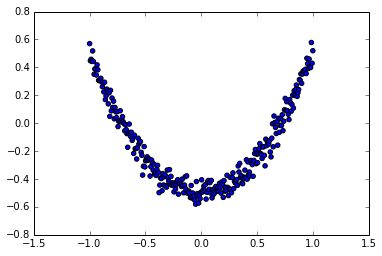

In [23]:
# Make up some fake data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise        # y = x^2 - 0.5

# show the fake data
plt.scatter(x_data, y_data)
plt.show()

In [28]:
#determine the inputs dtype
x, y = T.dmatrices('x', 'y')

l1 = Layer(x, 1, 10, T.nnet.relu)
l2 = Layer(l1.outputs, 10, 1, None)

#cost
cost = T.mean(T.square(l2.outputs - y))

#gradients
gw1, gb1, gw2, gb2 = T.grad(cost, [l1.w, l1.b, l2.w, l2.b])

#gradients descent
learning_rate = 0.05

train = theano.function([x,y], cost, updates=[(l1.w, l1.w - learning_rate * gw1), (l1.b, l1.b - learning_rate * gb1),
                       (l2.w, l2.w - learning_rate * gw2), (l2.b, l2.b - learning_rate * gb2)])

In [29]:
#prediction
predict = theano.function([x], l2.outputs)

for i in np.arange(1000):
    err = train(x_data, y_data)
    if i % 50 == 0:
        print err

5.54303323862
0.00551796812651
0.00451858663514
0.00430528260854
0.00419054337055
0.00411504090945
0.00405537914391
0.00400396211703
0.00395183998332
0.00390717343692
0.00386597279443
0.00383129435802
0.0037822844313
0.003741922904
0.00369423965682
0.00365316206186
0.00361000594064
0.00357288338826
0.00353459536269
0.003500848296
